In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("AUTORES_LIMPIOS.csv", index_col=0)

In [6]:
df['hasWikipedia'] = df['hasWikipedia'].astype(bool)
df['HasTwitter'] = df['HasTwitter'].astype(bool)
df['YearBirth'] = df['YearBirth'].astype(int, errors='ignore')

In [4]:
df.shape

(2927, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2926
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FullName      2927 non-null   object 
 1   Birthday      926 non-null    object 
 2   Gender        1075 non-null   object 
 3   Birthplace    986 non-null    object 
 4   StartYear     271 non-null    object 
 5   Nationality   725 non-null    object 
 6   HasTwitter    2927 non-null   bool   
 7   Born          1001 non-null   object 
 8   Genres        1609 non-null   object 
 9   hasWikipedia  2927 non-null   bool   
 10  YearBirth     921 non-null    float64
 11  Country       1702 non-null   object 
dtypes: bool(2), float64(1), object(9)
memory usage: 257.3+ KB


### Presencia en Twitter y Wikipedia de los autores

Text(0.5, 1.0, 'Presencia en Wikipedia')

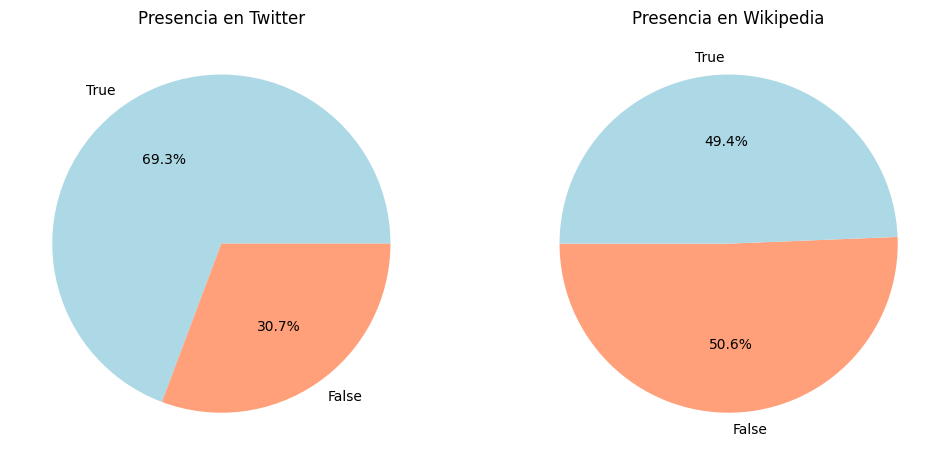

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para la columna 'hasTwitter'
has_twitter_counts = df['HasTwitter'].value_counts()
axes[0].pie(has_twitter_counts, labels=has_twitter_counts.index, colors=['lightblue', 'lightsalmon'], autopct='%1.1f%%')
axes[0].set_title('Presencia en Twitter')

# Gráfico para la columna 'hasWikipedia'
has_wikipedia_counts = df['hasWikipedia'].value_counts()
axes[1].pie(has_wikipedia_counts, labels=has_wikipedia_counts.index, colors=['lightsalmon', 'lightblue'], autopct='%1.1f%%', startangle=180)
axes[1].set_title('Presencia en Wikipedia')

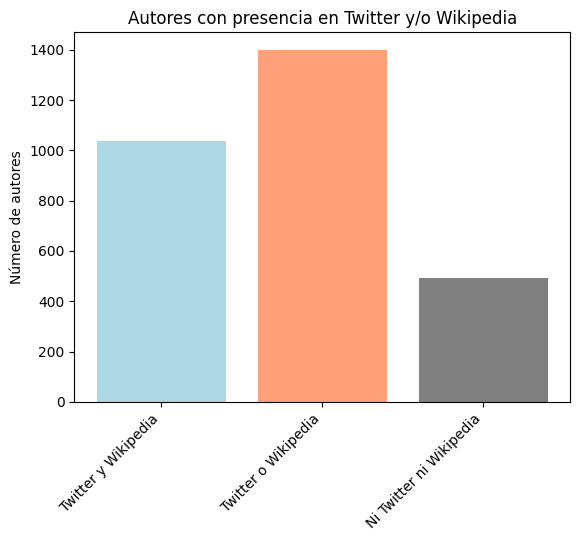

In [8]:
# Sobre el número TOTAL de autores

# Filtramos autores con Twitter y Wikipedia
has_twitter_and_wikipedia = df[(df['HasTwitter'] == True) & (df['hasWikipedia'] == True)]

# Filtramos autores sin Twitter ni Wikipedia
no_twitter_no_wikipedia = df[(df['HasTwitter'] == False) & (df['hasWikipedia'] == False)]

# Filtramos autores que tienen Twitter o Wikipedia, pero no ambos
has_either_twitter_or_wikipedia = df[(df['HasTwitter'] == True) | (df['hasWikipedia'] == True)].shape[0] - has_twitter_and_wikipedia.shape[0]

# Contamos el número de autores en cada categoría
counts = [has_twitter_and_wikipedia.shape[0], has_either_twitter_or_wikipedia, no_twitter_no_wikipedia.shape[0]]

# Etiquetas del eje x
labels = ['Twitter y Wikipedia', 'Twitter o Wikipedia', 'Ni Twitter ni Wikipedia']

# Definimos el rango de barras
x = range(len(labels))

plt.xticks(x, labels, rotation=45, ha='right')

# Gráfico de barras
plt.bar(x, counts, color=['lightblue', 'lightsalmon', 'grey'])

# Título y etiqueta del eje y
plt.title('Autores con presencia en Twitter y/o Wikipedia')
plt.ylabel('Número de autores')

plt.show()

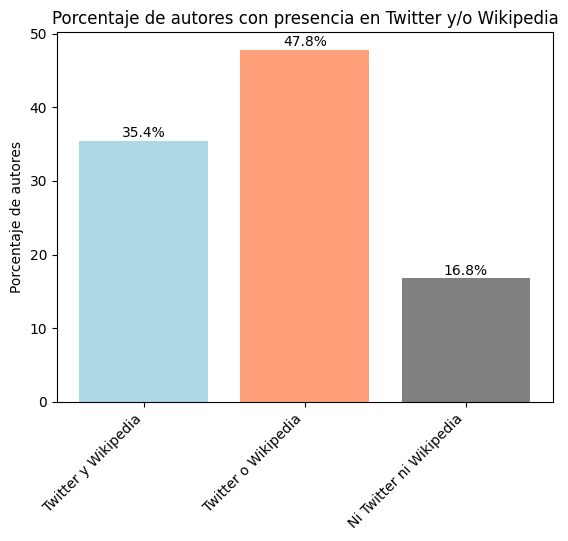

In [11]:
# Sobre el PORCENTAJE de autores

# Filtramos autores con Twitter y Wikipedia
has_twitter_and_wikipedia = df[(df['HasTwitter'] == True) & (df['hasWikipedia'] == True)]

# Filtramos autores sin Twitter ni Wikipedia
no_twitter_no_wikipedia = df[(df['HasTwitter'] == False) & (df['hasWikipedia'] == False)]

# Filtramos autores que tienen Twitter o Wikipedia, pero no ambos
has_either_twitter_or_wikipedia = df[(df['HasTwitter'] == True) | (df['hasWikipedia'] == True)].shape[0] - has_twitter_and_wikipedia.shape[0]

# Contamos el número de autores en cada categoría
total_authors = len(df)
counts = [has_twitter_and_wikipedia.shape[0], has_either_twitter_or_wikipedia, no_twitter_no_wikipedia.shape[0]]

# Calculamos los porcentajes
percentages = [count / total_authors * 100 for count in counts]

# Etiquetas del eje x
labels = ['Twitter y Wikipedia', 'Twitter o Wikipedia', 'Ni Twitter ni Wikipedia']

# Definimos el rango de barras
x = range(len(labels))

plt.xticks(x, labels, rotation=45, ha='right')

# Gráfico de barras con porcentajes en el eje y
plt.bar(x, percentages, color=['lightblue', 'lightsalmon', 'grey'])

# Título y etiqueta del eje y
plt.title('Porcentaje de autores con presencia en Twitter y/o Wikipedia')
plt.ylabel('Porcentaje de autores')

# Mostramos los porcentajes en el eje y
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage:.1f}%', ha='center')

plt.show()

### Género de los autores

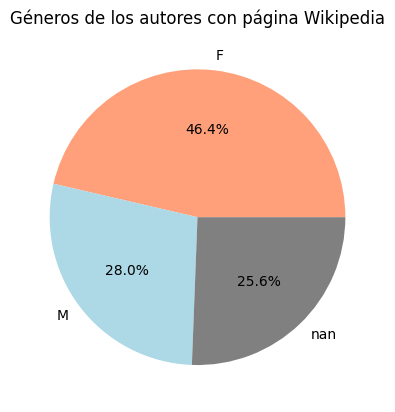

In [25]:
# Filtramos los autores que tienen Wikipedia ya que son de los que hemos podido obtener su género
filtered_df = df[df['hasWikipedia'] == True]

# Contar los valores de género en el DataFrame filtrado
gender_counts = filtered_df['Gender'].value_counts(dropna=False)

# Definir los colores
colors = ['lightsalmon', 'lightblue', 'grey']

# Crear el gráfico de pastel
plt.pie(gender_counts, labels=gender_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Géneros de los autores con página Wikipedia')
plt.show()

### Autores por país

In [62]:
df['Country'].value_counts().head(20)

Country
United States     1032
United Kingdom     216
Canada              80
Australia           38
Ireland             25
China               19
India               17
Japan               12
New York             9
South Africa         9
Scotland             8
New Zealand          8
France               8
Sri Lanka            7
Sweden               6
Nigeria              6
Singapore            5
Ontario              5
Spain                5
Ohio                 5
Name: count, dtype: int64

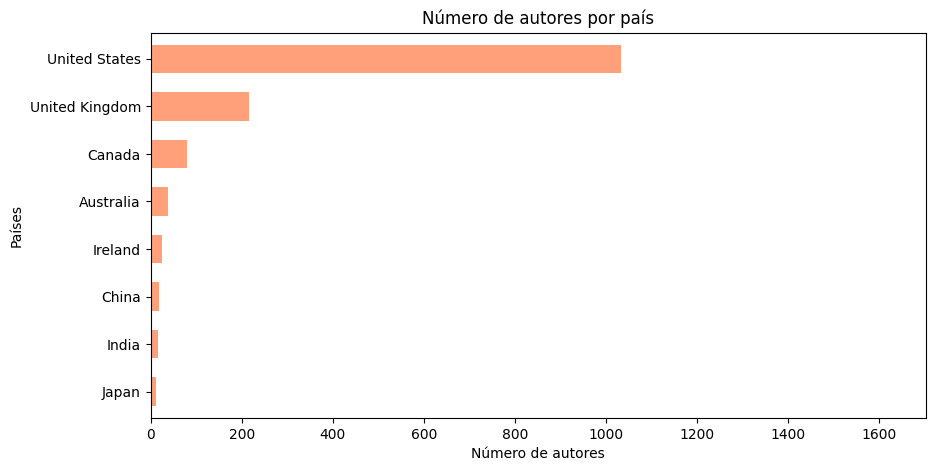

In [79]:
# Obtenemos los datos de los 8 primeros países con mayor número de autores
country_counts = df['Country'].value_counts().head(8)

# Contamos el número de valores no nulos en la columna 'Country'
num_not_null = df['Country'].notnull().sum()

# Creamos el gráfico de barras horizontales
plt.figure(figsize=(10, 5))
country_counts.plot(kind='barh', color='lightsalmon', width = 0.6)

# Establecemos los límites del eje x para mostrar hasta el total de autores
plt.xlim(0, num_not_null)

# Etiquetas
plt.xlabel('Número de autores')
plt.ylabel('Países')
plt.title('Número de autores por país')

# Invertimos el eje y para que los países con más autores estén arriba
plt.gca().invert_yaxis()

plt.show()